In [3]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
(train_images, train_labels),(test_images,test_labels)=datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
train_images,test_images=train_images/255.0,test_images/255.0

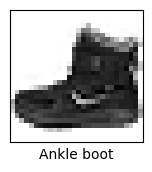

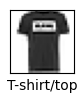

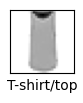

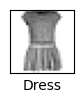

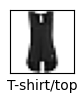

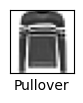

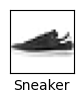

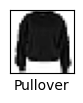

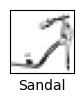

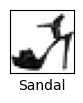

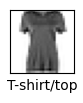

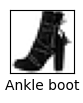

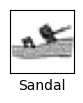

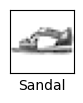

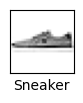

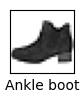

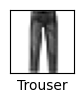

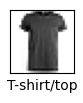

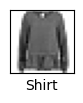

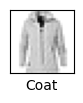

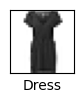

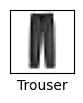

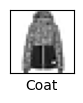

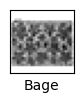

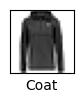

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bage','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [7]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7477 - loss: 0.6902 - val_accuracy: 0.8720 - val_loss: 0.3616
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8778 - loss: 0.3369 - val_accuracy: 0.8781 - val_loss: 0.3283
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8969 - loss: 0.2770 - val_accuracy: 0.8820 - val_loss: 0.3111
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9096 - loss: 0.2439 - val_accuracy: 0.8990 - val_loss: 0.2754
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9177 - loss: 0.2212 - val_accuracy: 0.9037 - val_loss: 0.2740
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9276 - loss: 0.1995 - val_accuracy: 0.9073 - val_loss: 0.2589
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9338 - loss: 0.1777 - val_accuracy: 0.9001 - val_loss: 0.2836
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9383 - loss: 0.1647 -

In [10]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(f"Accuracy :{test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.9093 - loss: 0.2826
Accuracy :0.9093000292778015


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


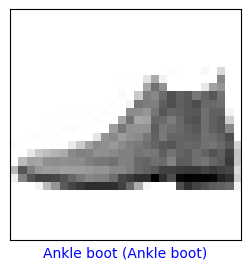

In [11]:
predictions = model.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)
    predicted_label = predictions_array[i].argmax()
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.figure(figsize=(6,3))
plot_image(0, predictions, test_labels, test_images)
plt.show()


In [12]:
model.save('fashion_mnist_cnn.h5')


In [13]:
from tensorflow.keras.models import load_model
model = load_model('fashion_mnist_cnn.h5')
